In [4]:
import numpy as np

## Задача 1: 
Написать свой класс линейной регрессии. Должны быть реализованы методы fit() и predict(). Из сторонних библиотек можно использовать только numpy и pandas. Если у вас есть аргумент для использования дополнительных библиотек, то напишите в личные сообщения, обсудим. Модель должна уметь работать с любым количеством признаков. 

Максимум за задачу можно получить 4 балла

In [1]:
class CustomLinReg():
    def __init__(self):
        super(CustomLinReg, self).__init__()
        self.weights = None
    
    def fit(self, X, y, lr = 1e-2, n_iter = 2500):
        '''
        Fit weights of linear regression using simple gradient descent
        
        :param X: numpy array of shape (N, n_features) where N - number of examples
        :param y: numpy array of shape (N)
        :param lr: learning rate of gradient descent
        :param n_iter: maximum number of iterations in gradient descent
        '''
        
        if X.shape[0] != y.shape[0]:
            raise Exception(f"Number of examples inconsistent. Found {X.shape[0]} in features and {y.shape[0]} in target")
        
        N = X.shape[0]
        X = self.add_constant(X)
        self.weights = np.random.randn(X.shape[1])*0
        
        for i in range(n_iter):
            pred = np.dot(X, self.weights)
            self.weights -= lr*(2./N)*np.dot(pred - y, X)
    
    def predict(self, X):
        '''
        Fit weights of linear regression using simple gradient descent
        
        :param X: numpy array of shape (N, n_features)
        '''
        if self.weights is None:
            raise Exception("Weights are not initialized yet! You should first train model")
        if len(self.weights) - 1 != X.shape[1]:
            raise Exception(f"Number of features inconsistent. {len(self.weights) - 1} expected, but given {X.shape[1]}")
        
        X = self.add_constant(X)
        res = np.dot(X, self.weights)
        
        return res
        
    @staticmethod
    def add_constant(X):
        '''
        Adds column of ones to input matrix in order to consider bias in linear regression naturally
        '''
        N = X.shape[0]
        X = np.hstack((np.ones((N, 1), dtype=X.dtype), X))
        return X

In [2]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

def test_model(model, n_datasets, model_name, random_seed = 10):
    np.random.seed(random_seed)
    
    mse = []
    mae = []
    
    for i in range(n_datasets):
        X, y = make_regression(n_samples=100, n_features=20, n_informative=20, noise = 1, n_targets=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
        
        model.fit(X_train, y_train)
        mse.append(mean_squared_error(y_test, model.predict(X_test)))
        mae.append(mean_absolute_error(y_test, model.predict(X_test)))
    
    return f"{model_name} results | MSE {np.mean(mse)} | MAE {np.mean(mae)}"

Модель работает с любым числом признаков

In [5]:
for i in np.arange(5, 1005, 100):
    model = CustomLinReg()
    X, y = make_regression(n_samples=100, n_features=i, n_informative=i, noise = 1, n_targets=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
    model.fit(X_train, y_train, n_iter = 50*i)
    
    mse = mean_squared_error(y_test, model.predict(X_test))
    mae = mean_absolute_error(y_test, model.predict(X_test))
    print(f"Cusom modem results with {i} features | MSE {np.mean(mse)} | MAE {np.mean(mae)}")

Cusom modem results with 5 features | MSE 23.487104269165524 | MAE 4.0816901051491286
Cusom modem results with 105 features | MSE 245552.79113626768 | MAE 402.2758054774078
Cusom modem results with 205 features | MSE 733268.0543175968 | MAE 698.1418392473225
Cusom modem results with 305 features | MSE 815144.9521559397 | MAE 779.8858324122702
Cusom modem results with 405 features | MSE 1515628.3912702897 | MAE 997.5360731067399
Cusom modem results with 505 features | MSE 1706250.0811866352 | MAE 998.0170538069812
Cusom modem results with 605 features | MSE 2418137.042366232 | MAE 1177.906502744009
Cusom modem results with 705 features | MSE 1535499.2712954774 | MAE 1052.0936674343159
Cusom modem results with 805 features | MSE 2059625.657539046 | MAE 1201.486759702103
Cusom modem results with 905 features | MSE 3044070.918086831 | MAE 1431.782293933134


Сравнение с моделью из sklearn

In [6]:
print(test_model(CustomLinReg(), n_datasets = 25, model_name = "Custom model"))
print(test_model(Ridge(), n_datasets = 25, model_name = "Sklearn model"))

Custom model results | MSE 1.6763763925396886 | MAE 1.0233485339170696
Sklearn model results | MSE 124.10722748301382 | MAE 8.538122376473087


## Задача 2: 
Написать свой класс градиентного бустинга для задачи регрессии. Должны быть реализованы методы fit() и predict(). Из сторонних библиотек можно использовать только numpy и pandas. Если у вас есть аргумент для использования дополнительных библиотек, то напишите в личные сообщения, обсудим. Модель должна уметь работать с любым количеством признаков. 

Максимум за задачу можно получить 4 балла. 2 балла можно получить если реализовать только класс решающего дерева.

In [7]:
class DecisionTree():
    def __init__(self, max_depth = 3):
        super(DecisionTree, self).__init__()
        
        self.max_depth = max_depth
        
        self.tree = None
    
    def fit(self, X, y):
        '''
        Fit structure of decision tree
        
        :param X: numpy array of shape (N, n_features) where N - number of examples
        :param y: numpy array of shape (N)
        '''
        if X.shape[0] != y.shape[0]:
            raise Exception(f"Number of examples inconsistent. Found {X.shape[0]} in features and {y.shape[0]} in target")
        
        self.tree = self.grow_tree(X, y)
        
    
    def grow_tree(self, X, y, depth = 0):
        
        if (depth >= self.max_depth) or (X.shape[0] <= 2):
            node = {
                "right": None,
                "left": None,
                "val": np.mean(y),
                "feature": None,
                "threshold": None,
                "impurity": None
            }
            return node
        
        split_num, split_val, max_impurity = self.split_node(X, y)
        
        node = {
            "right": self.grow_tree(X[X[:, split_num] < split_val],
                                    y[X[:, split_num] < split_val], 
                                    depth + 1),
            "left": self.grow_tree(X[X[:, split_num] >= split_val],
                                   y[X[:, split_num] >= split_val],
                                   depth + 1),
            "val": np.mean(y),
            "feature": split_num,
            "threshold": split_val,
            "impurity": max_impurity
        }
        
        return node
    
    def split_node(self, X, y):
        '''
        :param X: numpy array of shape (N, n_features) where N - number of examples
        :param y: numpy array of shape (N)
        '''
        
        max_impurity = -1
        
        for feature_num in range(X.shape[1]):
            feature_imp, feature_split_val = self.feature_impurity(X[:, feature_num], y)
            if feature_imp >= max_impurity:
                max_impurity, split_num, split_val = feature_imp, feature_num, feature_split_val
        
        return split_num, split_val, max_impurity
            
    
    @staticmethod
    def feature_impurity(X, y):
        '''
        :param X: numpy array of shape (N) where N - number of examples
        :param y: numpy array of shape (N)
        '''
        X = -np.sort(np.unique(-X))

        max_impurity, split_val = -1, X[0]
        for val in X[1: -1]:
            split1, split2 = y[X < val], y[X >= val]
            
            w1, w2 = len(split1)/len(y), len(split2)/len(y)
            
            impurity_before = np.sum(np.square(np.expand_dims(y, 0) - np.expand_dims(y, 1)))/(len(y)*len(y))
            impurity_split1 = np.sum(np.square(np.expand_dims(split1, 0) - np.expand_dims(split1, 1)))/(len(split1)*len(split1))
            impurity_split2 = np.sum(np.square(np.expand_dims(split2, 0) - np.expand_dims(split2, 1)))/(len(split2)*len(split2))
            
            impurity = impurity_before - (w1*impurity_split1 + w2*impurity_split2)
            
            if impurity > max_impurity:
                split_val, max_impurity = val, impurity
        
        return max_impurity, split_val
    
    def predict_one(self, x):
        curr = self.tree
        
        while True:
            if curr["left"] is None:
                return curr["val"]
            
            if x[curr["feature"]] < curr["threshold"]:
                curr = curr["right"]
            else:
                curr = curr["left"]
    
    def predict(self, X):
        '''
        :param X: numpy array of shape (N, n_features)
        '''
        
        res = []
        for i in range(X.shape[0]):
            res.append(self.predict_one(X[i, :]))
            
        return np.array(res)

Дерево работает

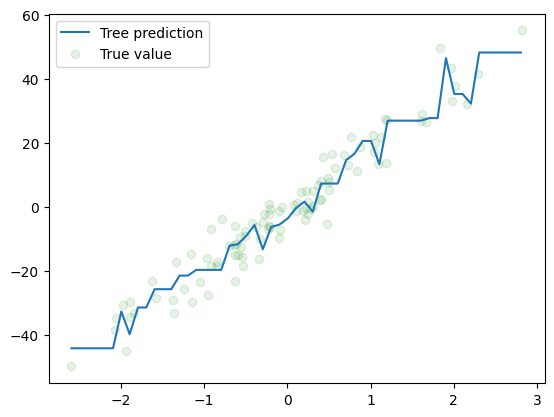

In [8]:
import matplotlib.pyplot as plt

np.random.seed(25)

X, y = make_regression(n_samples=100, n_features=1, n_informative=20, noise = 5, n_targets=1)

model = DecisionTree(max_depth = 10)

model.fit(X, y)

X1 = np.expand_dims(np.arange(min(X), max(X), 0.1), 1)
y1 = model.predict(X1)

plt.plot(X1, y1, label = "Tree prediction")
plt.scatter(X, y, color = "g", alpha = 0.1, label = "True value")
plt.legend()

Тестирование работоспособности отдельного дерева (оно переобучается с ростом глубины, что объясняет падение качества)

In [9]:
print(test_model(DecisionTree(max_depth = 3), n_datasets = 10, model_name = "Tree depth 3"))
print(test_model(DecisionTree(max_depth = 7), n_datasets = 10, model_name = "Tree depth 7"))
print(test_model(DecisionTree(max_depth = 12), n_datasets = 10, model_name = "Tree depth 12"))
print(test_model(DecisionTree(max_depth = 20), n_datasets = 10, model_name = "Tree depth 20"))
print(test_model(DecisionTree(max_depth = 40), n_datasets = 10, model_name = "Tree depth 40"))

Tree depth 3 results | MSE 75405.3445698485 | MAE 225.44080806894098
Tree depth 7 results | MSE 100409.07418133462 | MAE 252.98863056310228
Tree depth 12 results | MSE 110038.46431118282 | MAE 265.16658125538004
Tree depth 20 results | MSE 112537.34824771163 | MAE 266.2279889472148
Tree depth 40 results | MSE 112638.20958961947 | MAE 266.5135889564459


In [10]:
from copy import deepcopy

class GradientBoosting():
    def __init__(self, num_trees = 10, lr = 0.1, max_depth = 3):
        super(GradientBoosting, self).__init__()
        
        self.max_depth = max_depth
        self.num_trees = num_trees
        self.curr_num = 0
        self.lr = lr
        
        self.init_val = None
        self.tree_models = [DecisionTree(max_depth = self.max_depth) for _ in range(num_trees)]
    
    def fit(self, X, y):
        '''
        Fit gradient boosting on decision trees based on l2 loss
        
        :param X: numpy array of shape (N, n_features) where N - number of examples
        :param y: numpy array of shape (N)
        '''
        
        self.init_val = np.mean(y)
        
        for i in range(self.num_trees):
            
            # train model on residuals of previous ensemble
            y1 = (y - self.predict(X))
            self.tree_models[i].fit(X, y1)
            
            # Optimize new model further
            self.tree_models[i] = self.optimize_coef(X, y, self.tree_models[i])
            
            self.curr_num += 1
            
            
    def optimize_coef(self, X, y, model):
        '''
        Correct values in leafs of trees in boosting, minimizing l2 loss.
        '''
        
        stack = [(model.tree, X.copy(), y.copy())]
        while len(stack) > 0:
            tree, X_slice, y_slice = stack.pop()
            if tree["left"] is None:
                # optimal value
                tree["val"] = np.mean(y_slice - self.predict(X_slice))
                continue
            
            f_num, threshold = tree["feature"], tree["threshold"]
            
            stack.append((tree["right"], X_slice[X_slice[:, f_num] < threshold], y_slice[X_slice[:, f_num] < threshold]))
            stack.append((tree["left"], X_slice[X_slice[:, f_num] >= threshold], y_slice[X_slice[:, f_num] >= threshold]))
        
        return model
            
        
    def predict(self, X):
        
        if self.init_val is None:
            raise Exception("Parameters are not initialized yet! You should first train model")
        
        val = self.init_val
        
        for model in self.tree_models[0:self.curr_num]:
            val += self.lr*model.predict(X)
        
        return val
        

Тестирование бустинга

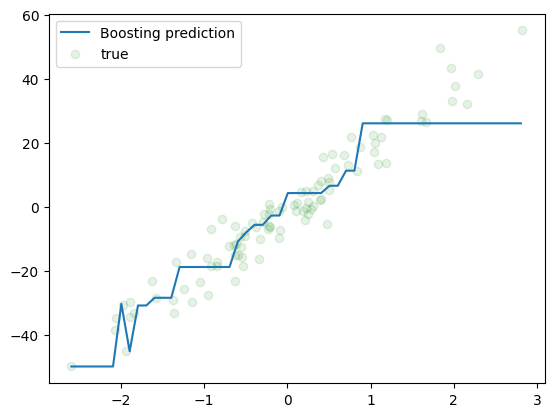

In [11]:
import matplotlib.pyplot as plt

np.random.seed(25)

X, y = make_regression(n_samples=100, n_features=1, n_informative=20, noise = 5, n_targets=1)

model = GradientBoosting(num_trees = 300)

model.fit(X, y)

X1 = np.expand_dims(np.arange(min(X), max(X), 0.1), 1)
y1 = model.predict(X1)

plt.plot(X1, y1, label = "Boosting prediction")
plt.scatter(X, y, color = "g", alpha = 0.1, label = "true")
plt.legend()

In [12]:
print(test_model(GradientBoosting(num_trees = 10), n_datasets = 5, model_name = "Boosing on 10 stumps"))
print(test_model(GradientBoosting(num_trees = 100), n_datasets = 5, model_name = "Boosing on 100 stumps"))
print(test_model(GradientBoosting(num_trees = 300), n_datasets = 5, model_name = "Boosing on 300 stumps"))

Boosing on 10 stumps results | MSE 70483.09570576012 | MAE 219.00803288061243
Boosing on 100 stumps results | MSE 78039.91954359702 | MAE 229.73309538217512
Boosing on 300 stumps results | MSE 78066.34250261328 | MAE 229.77882723766896


In [13]:
from sklearn.ensemble import GradientBoostingRegressor

print(test_model(GradientBoostingRegressor(n_estimators = 10), n_datasets = 5, model_name = "Boosing on 10 stumps"))
print(test_model(GradientBoostingRegressor(n_estimators = 100), n_datasets = 5, model_name = "Boosing on 50 stumps"))
print(test_model(GradientBoostingRegressor(n_estimators = 300), n_datasets = 5, model_name = "Boosing on 100 stumps"))

Boosing on 10 stumps results | MSE 52030.18534641347 | MAE 180.22495547245902
Boosing on 50 stumps results | MSE 47236.14222650529 | MAE 172.33142437433042
Boosing on 100 stumps results | MSE 62928.191845022746 | MAE 196.9375693320929


Результаты примерно сравнимы. То, что кастомная модель хуже, объясняется, вероятно, более сложным алгоритмом подбора структуры деревьев в градиентном бустинге из sklearn.